In [1]:
%load_ext lab_black

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

In [3]:
DATA_DIR = os.path.join("..", "data")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_CSV_PATH = os.path.join(DATA_DIR, "test.csv")
CLASS_NAMES_PATH = os.path.join(DATA_DIR, "class_names.joblib")

In [4]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
X_train = train_df.drop("target", axis=1).values
y_train = train_df["target"].values

In [5]:
test_df = pd.read_csv(TEST_CSV_PATH)
X_test = test_df.drop("target", axis=1).values
y_test = test_df["target"].values

In [6]:
feature_names = test_df.drop("target", axis=1).columns

In [7]:
class_names = joblib.load(CLASS_NAMES_PATH)

### Full Tree

In [8]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

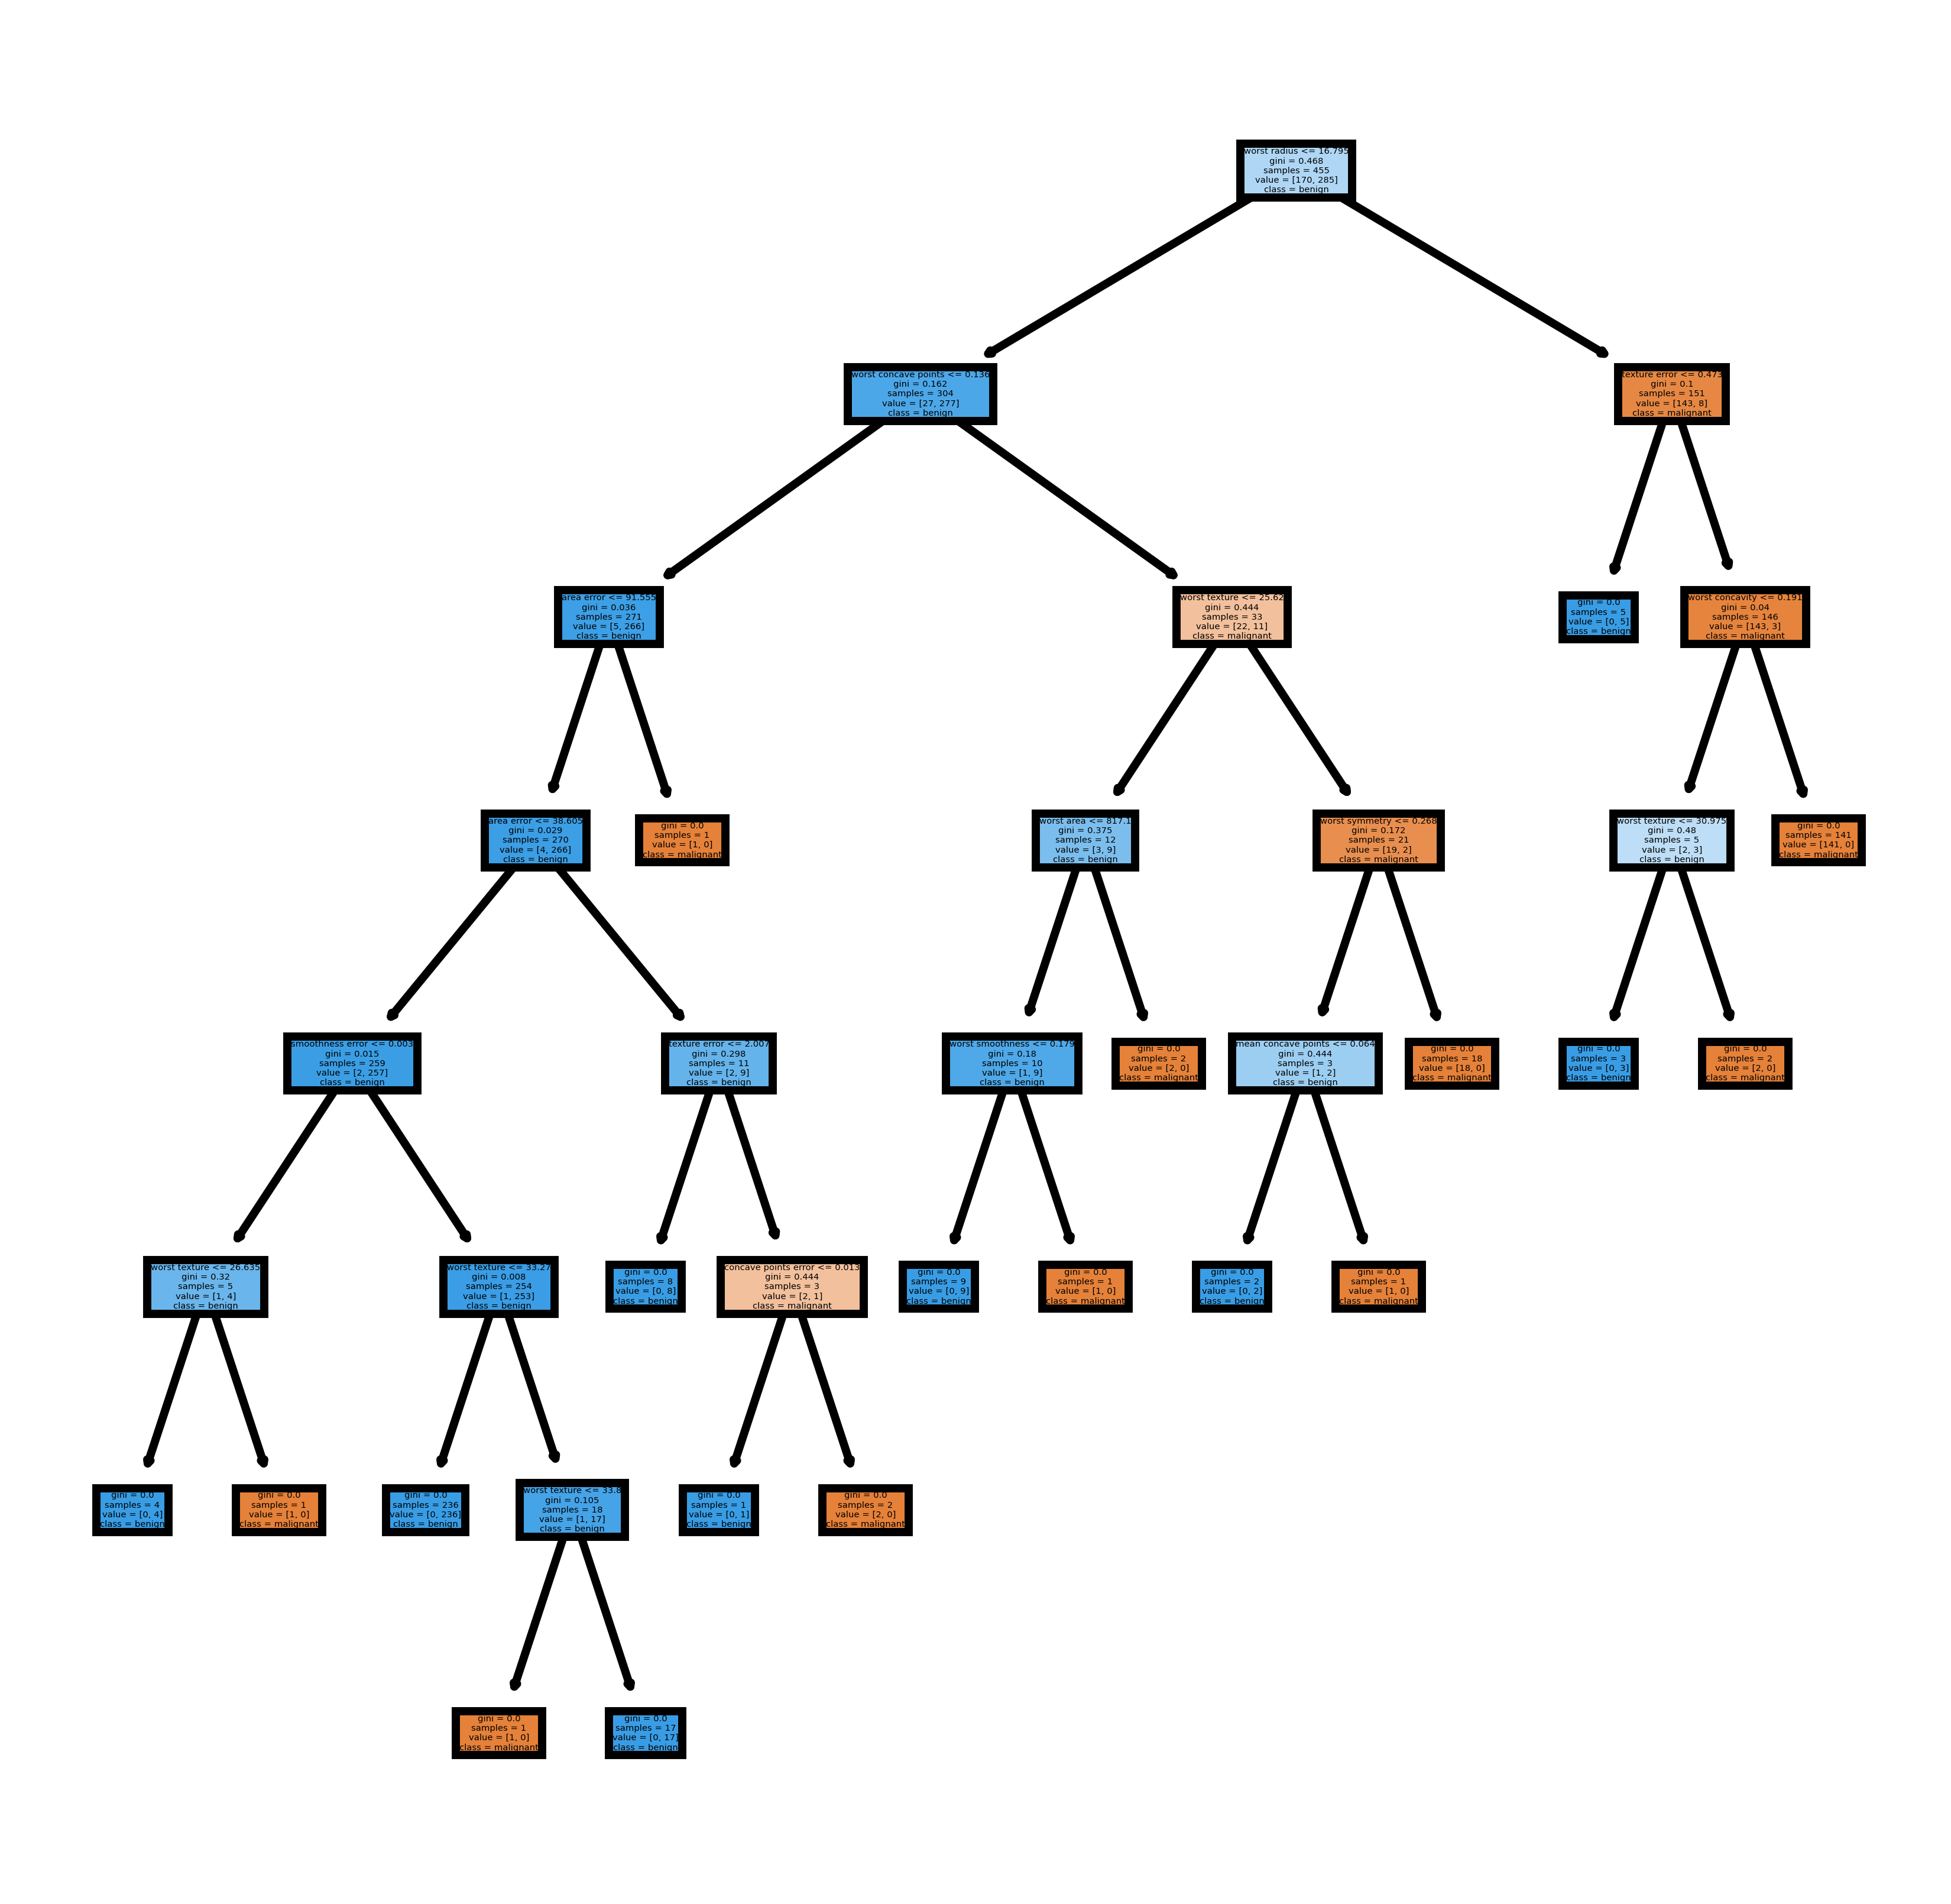

In [9]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(full_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [10]:
print(classification_report(y_test, full_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Best Depth Tree

In [11]:
max_depth = full_tree.get_depth()

In [12]:
max_depth

7

In [13]:
max_depth_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {"max_depth": [[max_depth] for max_depth in range(1, max_depth + 1)]}
    ),
)

In [14]:
max_depth_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fefb3e53e50>,
             scoring=make_scorer(accuracy_score))

In [15]:
max_depth_grid_search.best_params_

{'max_depth': 4}

In [16]:
best_max_depth_tree = max_depth_grid_search.best_estimator_

In [17]:
best_max_depth = best_max_depth_tree.get_depth()

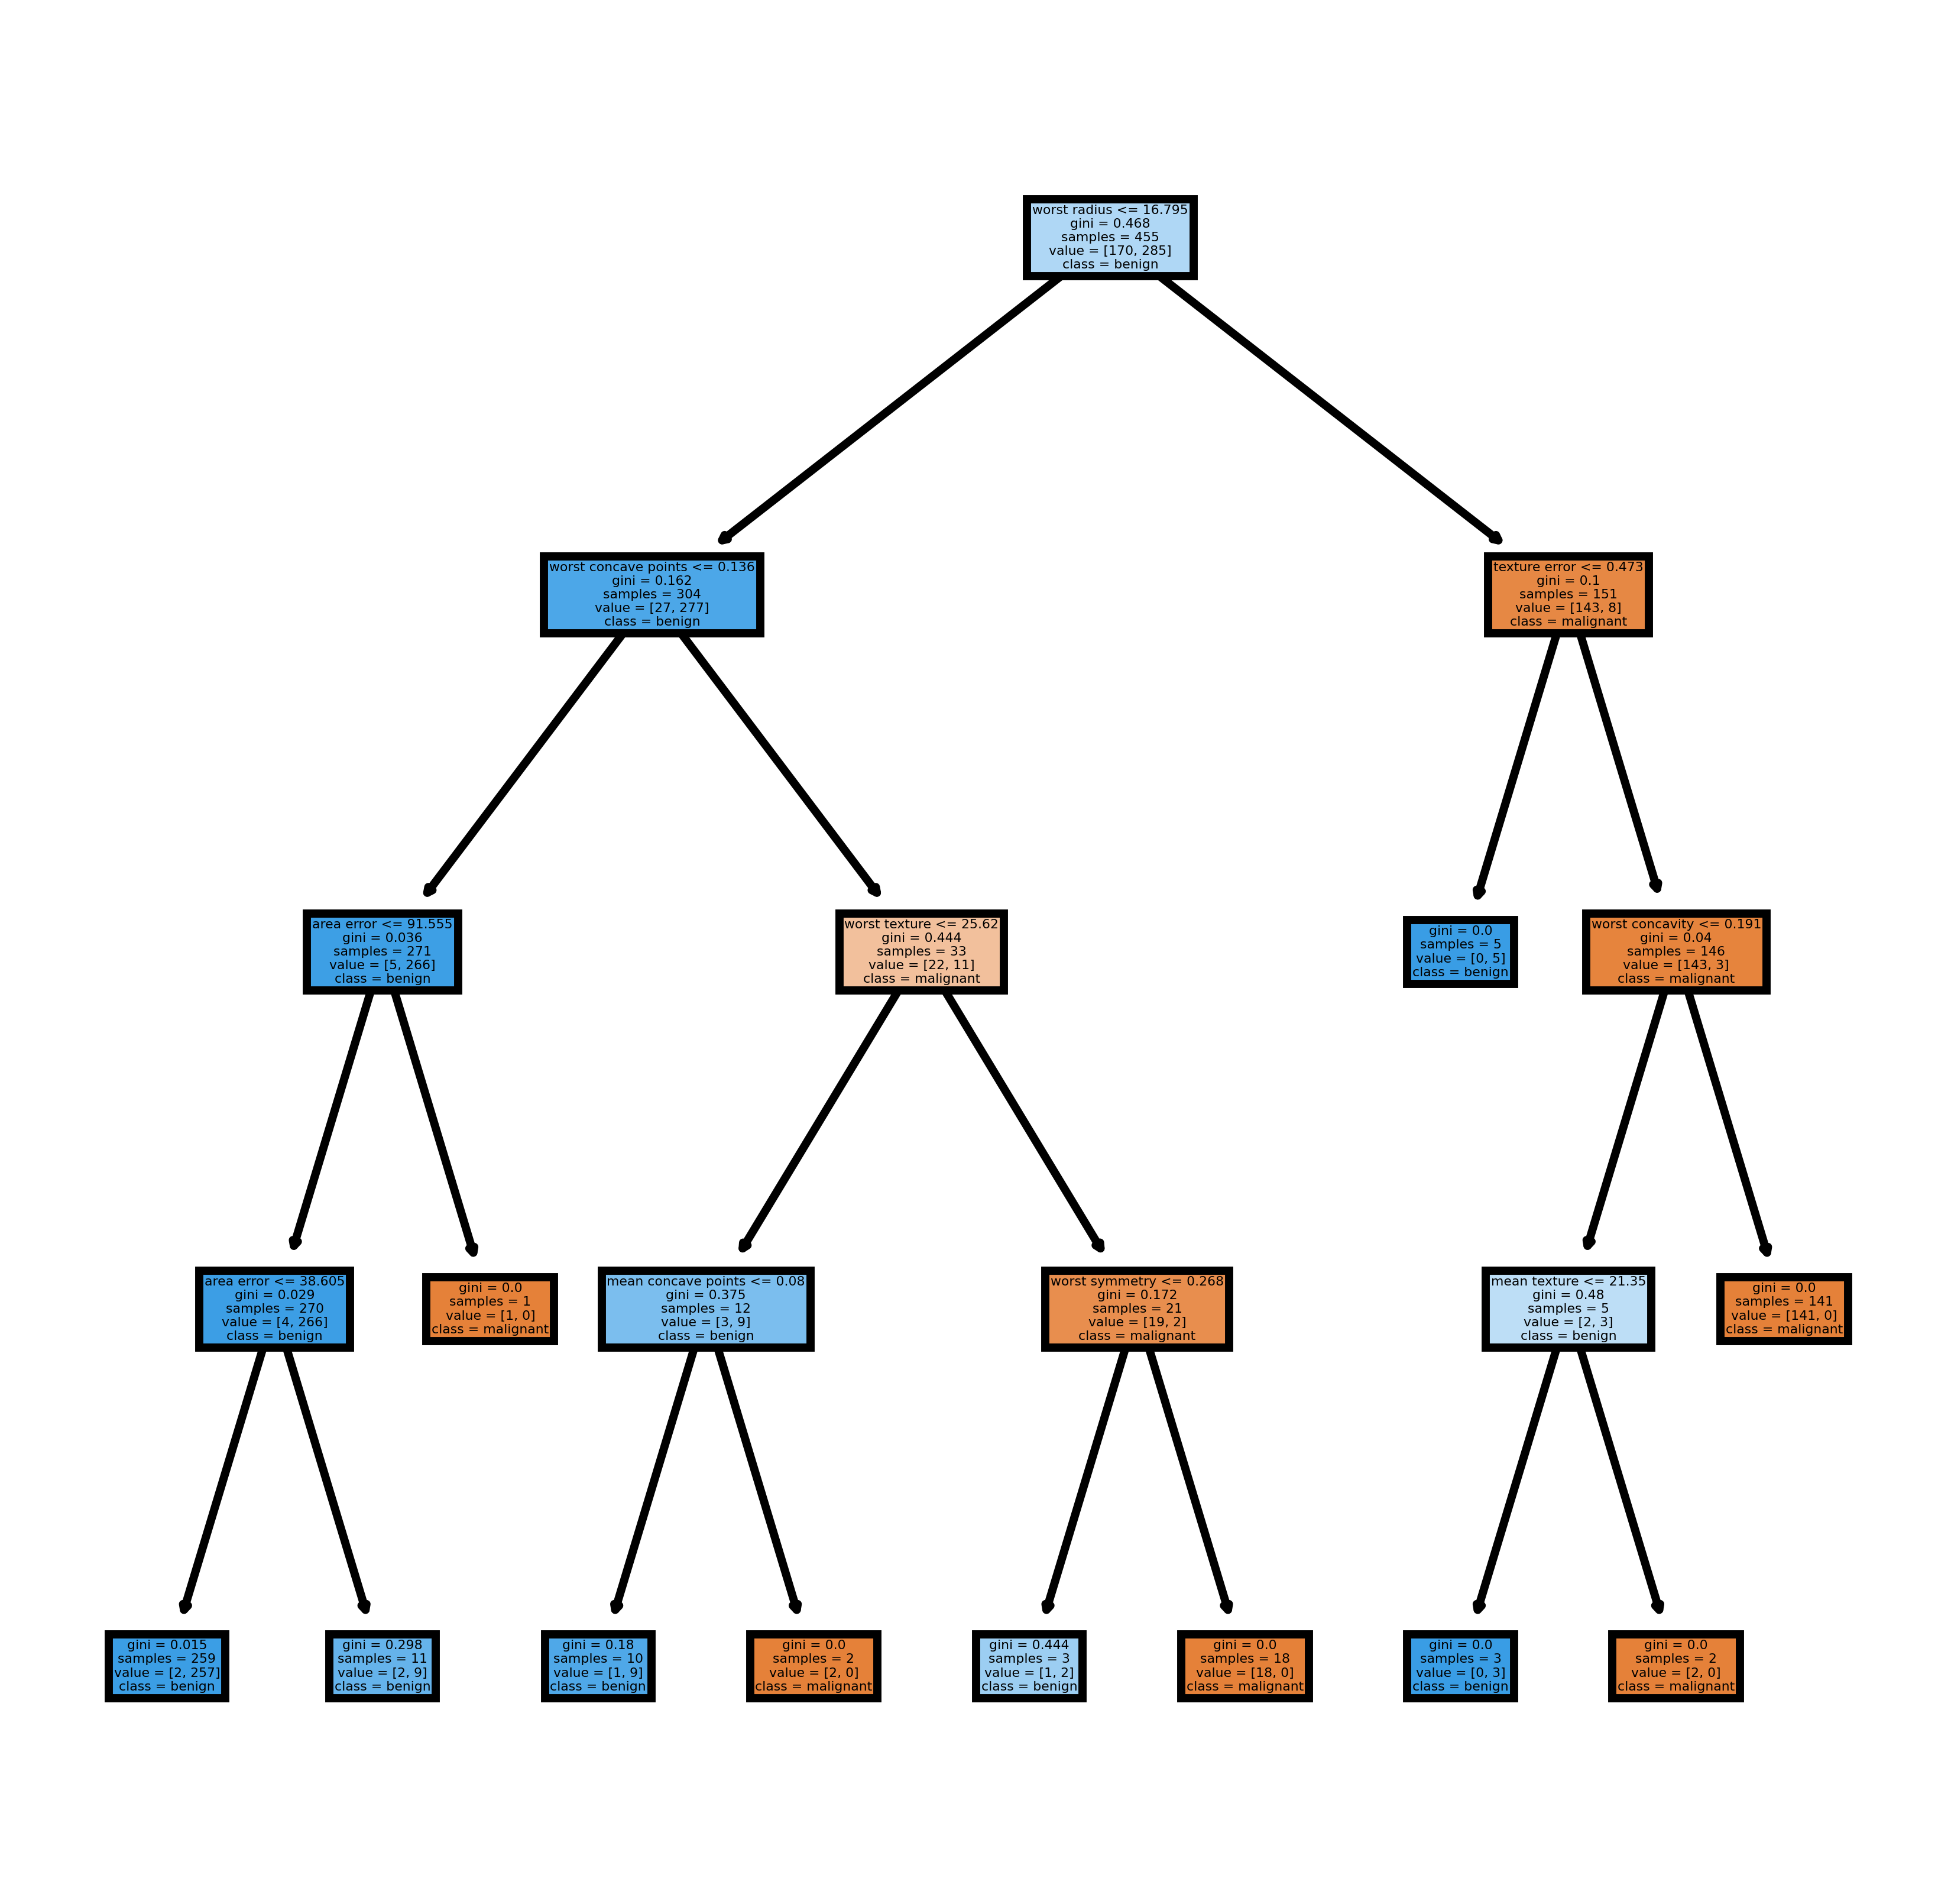

In [18]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_max_depth_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [19]:
print(classification_report(y_test, best_max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



### Pruned Tree

In [20]:
ccp_alphas = full_tree.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]

In [21]:
ccp_alphas

array([0.        , 0.00218083, 0.0028662 , 0.0029304 , 0.00395604,
       0.00425059, 0.00502355, 0.00527473, 0.00593407, 0.00764113,
       0.01439037, 0.02038595, 0.05433359, 0.32661707])

In [22]:
ccp_alpha_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),
)

In [23]:
ccp_alpha_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fefb3eb9c90>,
             scoring=make_scorer(accuracy_score))

In [24]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.005934065934065933}

In [25]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

In [ ]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_ccp_alpha_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [ ]:
print(classification_report(y_test, best_ccp_alpha_tree.predict(X_test)))